Can we recalculate the color gradient using NSA photometry?

In [1]:
import numpy as np

from astropy.table import Table

import matplotlib as mpl
import matplotlib.pyplot as plt

# Data

In [2]:
v101_filename = '/Users/kellydouglass/Documents/Research/data/NSA_v1_0_1_VAGC_CMDJan2020_vflag-V2-VF.fits'

NSA = Table.read(v101_filename)

# Calculate $\Delta (g - i)$

\begin{equation}
  \Delta (g - i) = (g - i)_{0.5R_p < r < R_p} - (g - i)_{r < 0.5R_p}
\end{equation}

We are going to use
\begin{equation}
  m(r < xR_p) = m(R_p) - 2.5\log x
\end{equation}
as found using the model adopted in the SGA.

In [3]:
NSA['ELPETRO_FLUX'][NSA['ELPETRO_FLUX'] < 0] = np.nan
NSA['ELPETRO_FLUX'][NSA['ELPETRO_FLUX'] > 50] = np.nan

In [4]:
NSA['ELPETRO_FLUX_TH50'] = NSA['ELPETRO_FLUX'] - 2.5*np.log10(0.5)

NSA['ELPETRO_ABSMAG_TH50'] = NSA['ELPETRO_ABSMAG'] - 2.5*np.log10(0.5)

In [8]:
dm = 2.5*np.log10( 10**(-0.4*NSA['ELPETRO_FLUX_TH50']) / ( 10**(-0.4*NSA['ELPETRO_FLUX']) - 10**(-0.4*NSA['ELPETRO_FLUX_TH50']) ) )

dM = 2.5*np.log10( 10**(-0.4*NSA['ELPETRO_ABSMAG_TH50']) / ( 10**(-0.4*NSA['ELPETRO_ABSMAG']) - 10**(-0.4*NSA['ELPETRO_ABSMAG_TH50']) ) )

/var/folders/5x/2533z9ns34n_8ghxd5f6hl0c0000gn/T/ipykernel_3755/3344609300.py:3: RuntimeWarning: divide by zero encountered in log10
  dM = 2.5*np.log10( 10**(-0.4*NSA['ELPETRO_ABSMAG_TH50']) / ( 10**(-0.4*NSA['ELPETRO_ABSMAG']) - 10**(-0.4*NSA['ELPETRO_ABSMAG_TH50']) ) )


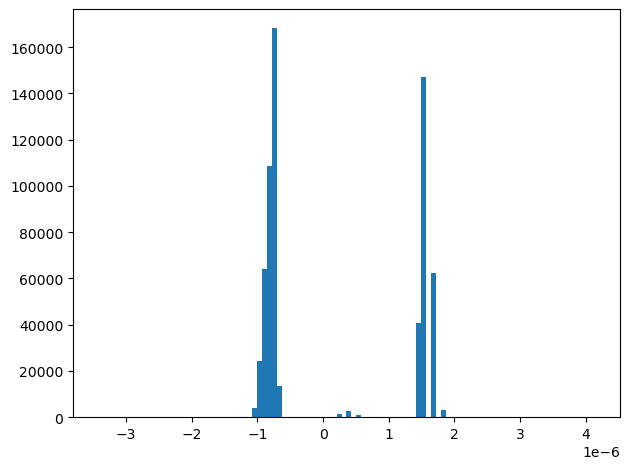

In [9]:
plt.figure(tight_layout=True)

plt.hist(dM[:,0], bins=100);

In [10]:
NSA['cd_NSA'] = dm[:,3] - dm[:,5]

NSA['cd_absmag_NSA'] = dM[:,3] - dM[:,5]

# Compare results

How do our color gradients compare to the KIAS values?

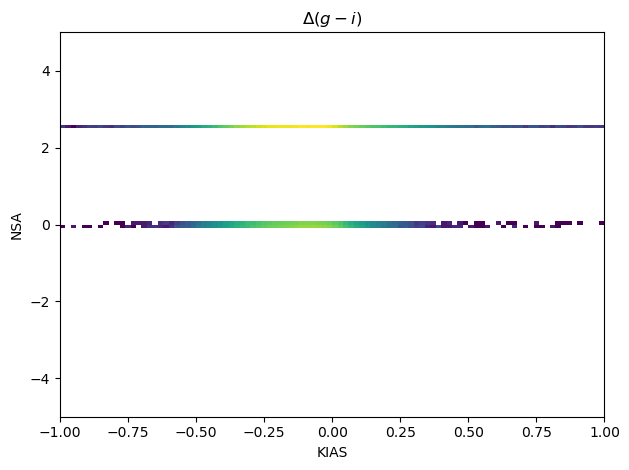

In [11]:
plt.figure(tight_layout=True)

plt.hist2d(NSA['cd'], NSA['cd_NSA'], bins=100, range=[[-1, 1], [-5, 5]], norm=mpl.colors.LogNorm())

plt.xlim(-1, 1)
plt.ylim(-5, 5)

plt.xlabel('KIAS')
plt.ylabel('NSA')

plt.title('$\Delta (g - i)$');

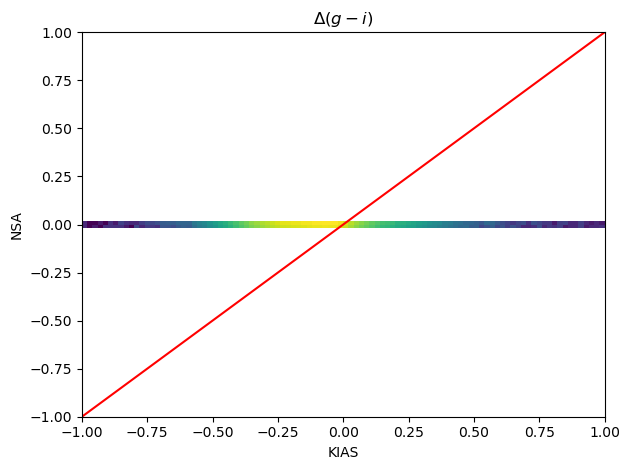

In [14]:
plt.figure(tight_layout=True)

plt.hist2d(NSA['cd'], NSA['cd_absmag_NSA'], bins=100, range=[[-1, 1], [-1, 1]], norm=mpl.colors.LogNorm())
plt.plot([-2, 2], [-2, 2], 'r')

plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.xlabel('KIAS')
plt.ylabel('NSA')

plt.title('$\Delta (g - i)$');

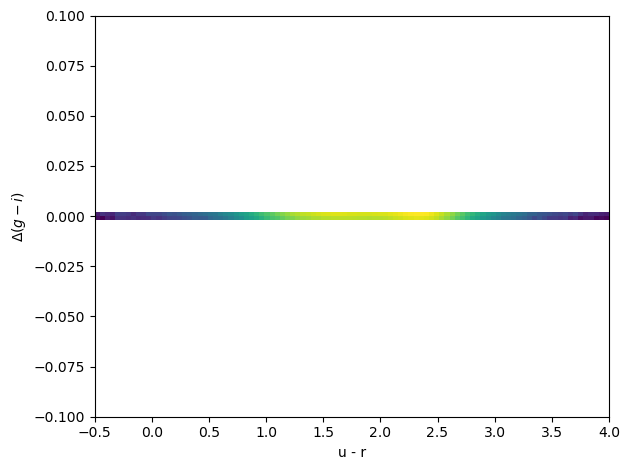

In [16]:
plt.figure(tight_layout=True)

plt.hist2d(NSA['u_r'], NSA['cd_absmag_NSA'], bins=100, range=[[-0.5, 4], [-0.1, 0.1]], norm=mpl.colors.LogNorm())

plt.xlim(-0.5, 4)
plt.ylim(-0.1, 0.1)

plt.xlabel('u - r')
plt.ylabel('$\Delta (g - i)$');

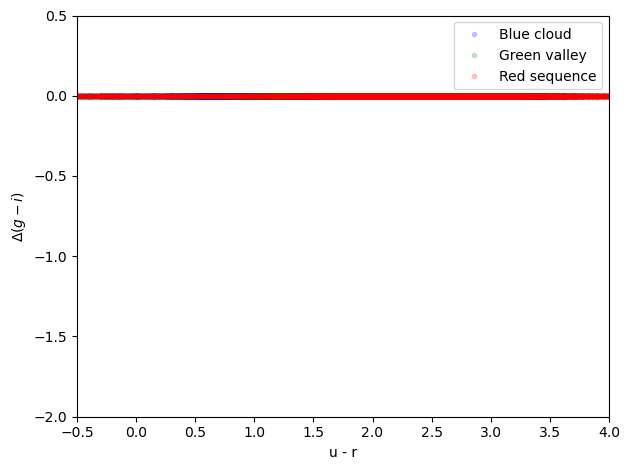

In [17]:
BC = NSA['CMD_class'] == 1
GV = NSA['CMD_class'] == 2
RS = NSA['CMD_class'] == 3

plt.figure(tight_layout=True)

plt.plot(NSA['u_r'][BC], NSA['cd_absmag_NSA'][BC], 'b.', alpha=0.2, label='Blue cloud')
plt.plot(NSA['u_r'][GV], NSA['cd_absmag_NSA'][GV], 'g.', alpha=0.2, label='Green valley')
plt.plot(NSA['u_r'][RS], NSA['cd_absmag_NSA'][RS], 'r.', alpha=0.2, label='Red sequence')

plt.xlim(-0.5, 4)
plt.ylim(-2, 0.5)

plt.xlabel('u - r')
plt.ylabel('$\Delta (g - i)$')

plt.legend();